# Image Class Project 2
* Irving Perez
* Alejandro Cedillo


## Introduction

Object tracking is a crucial task in computer vision with applications in various fields such as surveillance, traffic monitoring, human-computer interaction, and sports analytics. The ability to detect and follow an object’s movement across frames in a video stream is fundamental in many real-world applications, including security systems, autonomous vehicles, and augmented reality. Tracking a moving object, such as a person walking, allows for the extraction of motion patterns, identification of behavioral trends, and enhancement of situational awareness in different environments. 

The importance of visual tracking has grown significantly with the advancement of artificial intelligence and machine learning. Automated surveillance systems, for example, rely on object tracking to monitor and analyze human activity in real time, helping improve public safety. 

Similarly, in traffic management, tracking vehicles can help optimize road usage and prevent accidents. Sports analytics also benefit from tracking technologies to analyze player movements and improve team performance.
This project aims to implement a visual tracking algorithm in Python to track the movement of a person using the Meanshift algorithm. Meanshift is a well-established technique in computer vision that allows for robust tracking based on color histograms, making it an effective tool in environments where object shape and size may vary.

 The step-by-step implementation will be documented in a Jupyter Notebook, providing a structured approach to understanding and applying the algorithm in real-world scenarios. Through this implementation, the project seeks to demonstrate the practical applications of Meanshift and its capability in handling object tracking tasks effectively.


## Choise of traking algorithm

The **Meanshift** algorithm was chosen for this project due to its efficiency, adaptability, and robustness in object tracking. Unlike other tracking methods that require complex mathematical modeling or deep learning frameworks, Meanshift is a non-parametric iterative algorithm that does not depend on prior knowledge of object shape, size, or motion dynamics. 

Instead, it focuses on identifying and following areas with high pixel density, making it a computationally efficient choice for real-time applications. Meanshift works by iteratively shifting a search window toward the region of highest color density in an image, which makes it particularly useful for tracking objects with distinct color features. 
This property is advantageous in scenarios where objects may change in shape or orientation but retain a consistent color distribution. Additionally, since the algorithm does not rely on training data, it provides a flexible solution for tracking objects without requiring large datasets or extensive model training.

Its ability to adapt to dynamic environments while maintaining efficiency makes it a suitable choice for real-world implementations. Moreover, the integration of OpenCV facilitates seamless execution of the algorithm, leveraging powerful built-in functions to enhance tracking accuracy and performance. 

By implementing Meanshift, this project aims to highlight its practicality in object tracking while also addressing some of its limitations, such as sensitivity to abrupt changes in lighting or occlusions. 
Potential enhancements, including the use of Camshift (Continuously Adaptive Meanshift) for adaptive window sizing, could be explored to improve tracking stability. Ultimately, this project serves as a foundational step in understanding and applying Meanshift in real-world tracking applications, demonstrating its effectiveness and ease of use in Python.


## Step by step

>Step 1. Importing Required Libraries

We need to import the necessary libraries. We use NumPy for numerical operations, OpenCV for image processing, and Matplotlib for visualization.

In [85]:
import cvzone
from cvzone.ColorModule import ColorFinder
import numpy as np
import cv2 as cv

> Step 2: Get mask value

In [86]:

# Create the color Finder object
# True : debug mode
myColorFinder = ColorFinder(True)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)]
prediction = True

while True:
    # Grab the image
    # Display
    img = cv.imread("ball2.png")
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    imgContours, contours = cvzone.findContours(img,mask, minArea=200)

    imgColor = cv.resize(imgColor, (0, 0), None, 0.4, 0.4)
    
    # cv2.imshow("Image with Color", imgColor)
    cv.imshow("Video ball", imgColor)
    # Break the loop if the 'q' key is pressed
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()

{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'sma

>Step 3. Read the input video and get resolution

We load the video using OpenCV's VideoCapture function. We also extract the video's resolution, which helps us understand the frame size.

In [87]:

cap = cv.VideoCapture('Bouncing ball.mp4') 
  

In [88]:
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

print(f"Video Resolution: {frame_width}x{frame_height}")

Video Resolution: 1280x720


In [89]:
# take first frame of the video 
ret, frame = cap.read() 

>Step 4. Selecting the Region of Interest (ROI)

We manually select the region of interest in the first frame. This is the area where our object is located at the beginning of the video.

In [90]:
# Manually select ROI
roi = cv.selectROI("Select Tracking Region", frame, fromCenter=False, showCrosshair=True)
cv.destroyAllWindows()

In [91]:
roi

(547, 2, 234, 113)

>Step 5. Extracting the ROI and Getting Its Dimensions

Once we've selected the object, we extract the ROI and store its dimensions.

In [92]:
x, y, width_init, height_init = roi
track_window = (x, y, width_init, height_init) 

In [93]:
# set up the Region of interest for tracking
roi = frame[y:y + height_init, x : x + width_init]

In [94]:
roi.shape

(113, 234, 3)

>Step 6. Visualizing the Selected Region

To confirm our selection, we visualize the extracted ROI using Matplotlib.

In [95]:
import matplotlib.pyplot as plt
def plot_array(fillter):
    plt.imshow(cv.cvtColor(fillter, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Region of interest

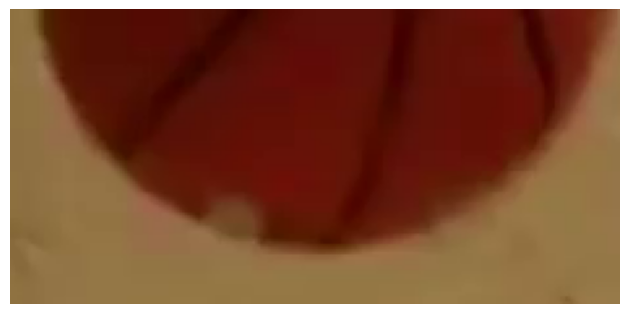

In [96]:
plot_array(roi)

>Step 7. Converting ROI to HSV and Creating a Mask

Since CamShift relies on color tracking, we convert our ROI from BGR to HSV color space and apply a mask to filter relevant colors.

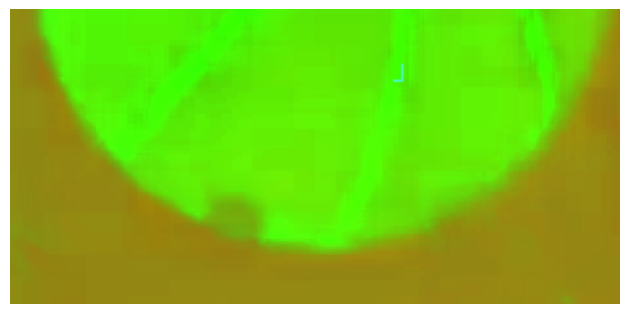

In [97]:
# convert ROI from BGR to HSV format 
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV) 
plot_array(hsv_roi)  

Mask window

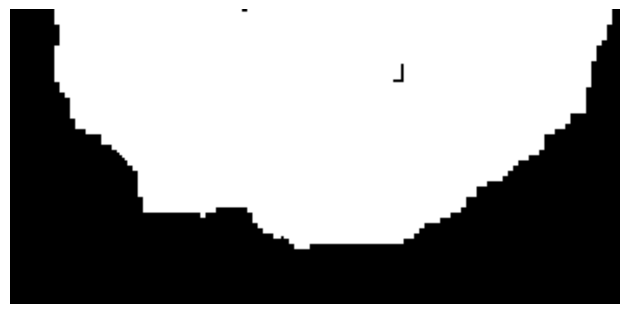

In [98]:
# perform masking operation 
# {'hmin': 0, 'smin': 90, 'vmin': 52, 'hmax': 10, 'smax': 255, 'vmax': 255}
mask = cv.inRange(hsv_roi, np.array((0., 90., 52.)), np.array((10., 255., 255))) 
plot_array(mask)  

>Step 8. Calculating the Histogram and Normalizing It

We compute the histogram of the ROI and normalize it. This histogram will be used for back-projection in each frame.

In [99]:
roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180]) 
cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX);

>Step 9. Defining the Termination Criteria for CamShift

We set the termination criteria for the CamShift algorithm. It will either run for a maximum of 15 iterations or stop when the window moves by less than 2 pixels.

In [100]:
# Termination criteria for camshift
# 15 iterations or window moves less than 2 pixels
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 15, 2)

>Step 10. Applying CamShift for Real-Time Object Tracking

Now that we have all the necessary elements, let's implement the object tracking loop.

In [101]:
original_area = width_init * height_init
min_area = original_area // 2  # If CamShift window shrinks too much, we reset

while(1):
    ret, frame = cap.read() 
    # thresholding
    ret1, frame1 = cv.threshold(frame, 180, 155, cv.THRESH_TOZERO_INV) 
    if frame1 is None:
        break
    # convert from BGR to HSV 
    hsv = cv.cvtColor(frame1, cv.COLOR_BGR2HSV)
    
    # Back projection
    dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
    
    prev_window = track_window
    # Apply Camshift 
    ret2, track_window = cv.CamShift(dst, track_window, term_crit)

    x, y, w, h = track_window
    if w > width_init*1.5 or h > height_init*2:
        track_window=prev_window

    if w * h < min_area :
        print("Ball lost. Searching with contours")

        mask = cv.inRange(hsv, np.array([0, 176, 51]), np.array([16, 255, 255]))
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        min_contour_area = min_area  # At least half of the original area
        ball_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_contour_area]

        if ball_contours:
            ball_contours = sorted(ball_contours, key=cv.contourArea, reverse=True)

            # Take the 2 largest contours if available
            if len(ball_contours) > 1:
                c1, c2 = ball_contours[:2]
                x1, y1, w1, h1 = cv.boundingRect(c1)
                x2, y2, w2, h2 = cv.boundingRect(c2)

                # Create a bounding box around both contours
                x = min(x1, x2)
                y = min(y1, y2)
                w = max(x1 + w1, x2 + w2) - x
                h = max(y1 + h1, y2 + h2) - y
            else:
                # Only one contour found
                x, y, w, h = cv.boundingRect(ball_contours[0])

            # Reset tracking with new bounding box
            track_window = (x, y, w, h)

            print(f"Ball found again at {track_window}")
            pts = cv.boxPoints(ret2)
            pts = np.int0(pts)
    else:
        pts = cv.boxPoints(ret2)
        pts = np.int0(pts)
    Result = cv.polylines(frame, [pts], True, (0, 255, 255), 2) 
    cv.imshow('Camshift', Result)
    # press ESC key to exit. 
    k = cv.waitKey(30) & 0xff
    
    if k == 27:
        break

cap.release() 
cv.destroyAllWindows() 

C:\Users\alexc\AppData\Local\Temp\ipykernel_21816\4124203879.py:60: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  pts = np.int0(pts)


Ball lost. Searching with contours
Ball found again at (542, 233, 194, 121)


C:\Users\alexc\AppData\Local\Temp\ipykernel_21816\4124203879.py:57: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  pts = np.int0(pts)


Ball lost. Searching with contours
Ball found again at (477, 498, 241, 124)
Ball lost. Searching with contours
Ball found again at (288, 138, 211, 148)
Ball lost. Searching with contours
Ball found again at (562, 540, 238, 92)
Ball lost. Searching with contours
Ball found again at (1121, 458, 157, 200)
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with contours
Ball lost. Searching with conto

This loop ensures that the object is continuously tracked, adjusting its position dynamically based on its movement in the video. If the object is lost due to occlusion or moving out of frame, the algorithm attempts to re-detect it. Finally, the tracked object is displayed in real-time, and the loop exits when the user presses the ESC key.

## Challenges

The nature of design of the ball with a division of a white line made it complicated for the ROI/window to track the ball completly the whole time since the algorithm was thinking it was to separated object but both moving in the same direction



<img src="ball2.png" alt="ball" width="600"/>

<img src="mask.png" alt="ball" width="600"/>





Aditionaly the video is not a continous movement of the ball bouncing but a recopilation of different videos with a ball, making it so that the ball is out of frame in more than 1 ocation so techniques such as contour finding where implemented.

## Resources
* Video tutoral for mask selection: https://www.youtube.com/watch?v=PVtmK8LmYpA&ab_channel=Murtaza%27sWorkshop-RoboticsandAI
* Meanshift with open cv: https://www.geeksforgeeks.org/track-objects-with-camshift-using-opencv/
* Article about object tracking and cvzone library: https://medium.com/@hichengkang/basketball-tracking-opencv-6482e48bc2b2

---
* Our Github repository: https://github.com/alexcega/Image-Tracking-Project